# Logistic Regression

# Learning Goals:
- Describe the need for logistic regression
- Describe how we translate a linear equation in a way to solve a classification problem 
- Fit and interpret results of logistic regression classifier


## 1. Describe the need for logistic regression



Thus far in the course we have encountered machine learning algorithms that use linear regression to predict continuous variables.

### Knowledge check:
What do we mean when we say a continuous variable?

In [ ]:
# Your answer here

A few examples of continuous variables we have seen are:

- price of a house
- miles per gallon of a car
- income of an employee


<img src='img/house_car.jpg' style="width:300px;height:300px;">

In mod 3, we will dive into a series of algorithms that attempt to predict a **discrete** target variables. Discrete variables are different from continuous variables in that they have a rigid set of possible values which they can be: 

<br>Binaries:
- 0 or 1, cat or dog, benign or malignant, survived or perished   

<br>Multiclass:

- [fastball curveball offspeed], [democrat republican independent green party]


In [ ]:
# What are some other discrete target variables that you can think of?

It is natural to start our journey through classification with an algorithm which translates that translates a concept we have already put to use. Queue logistic regression.

## 2. Describe the math behind logistic regression

![log_vs_linear](img/linear_vs_logistic_regression.jpg)

Fittingly, logistic regression comes from the same sklearn module as linear regression.

```Python
from sklearn.linear_model import logistic_regression
```

The motivation for logistic regression is to translate our familiar linear equation

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

so that it outputs a posterior probability, or in other words, the probability of a class given a set of dependent variables.


To do so, we have to find a way to translate the output of an equation which can yield any number so that it outputs a number between 0 and 1.

### Sigmoid function
The sigmoid function takes the following form:

$$\displaystyle \frac{1}{1+e^{-z}}$$
<br>

z in the above equation is our linear equation:
<br><br>
$$ z = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 


What happens if you input 
- a negative number?
- zero?
- a positive number?

In [ ]:
# your answer here

In [1]:
import pandas as pd
import numpy as np

def sigmoid(linear_output):
    '''
    Parameter: the output of the linear equation
    
    Returns: a number between 0 and 1 representing 
    the probability of a target class
    '''
    
    prob = 1/(1+ np.e**(-linear_output))
    
    return prob

In [4]:
# Test out the function with some potential outputs of the linear equation
sigmoid(-5)

0.006692850924284857

![sigmoid](img/SigmoidFunction_701.gif)

Any positive output of the linear equation input into the sigmoid will yield a number above .5. 
Any negative output will yield a number below .5

- .5 is the inflection point of the s-curve.
- Anything above .5 we will categorize as class 1
- Anything below .5 will be class 0

## Knowledge Check
 We were introduced to the concept of false negatives in hypothesis testing.  What could we do to the threshold to make our false negatives go down?

In [ ]:
# Your answer here

## Log Odds

If we rewrite the equation to be:

$$P(class_1|X_0,X_1,...X_n) = \displaystyle \frac{1}{1+e^{-z}}$$
<br>



we can show that, by multiplying both numerator and denominator by $e^{z}$


$$ P(class_1|X_0,X_1,...X_n)) = \displaystyle \frac{e^z}{1+e^z}$$

As a result, we can compute $P(class_0|z)$ as:

$$ P(class_0|X_0,X_1,...X_n) = 1- \displaystyle \frac{e^z}{1+e^z}= \displaystyle \frac{1}{1+e^z}$$



#### Odds ratio

This doesn't seem to be very spectacular, but combining these two results leads to an easy interpretation of the model parameters, triggered by the *odds*

$$ \dfrac{P(class_1|X_0,X_1,...X_n)}{P(class_0|X_0,X_1,...X_n)} = e^{z} $$

This expression can be interpreted as the odds in favor class 1

Taking the log of both sides leads to:
<br><br>
    $ln\dfrac{P(class_1)}{P(class_0)} = \beta_0 + \beta_1*X_1 + \beta_2*X_2...\beta_n*X_n$
    
Here me can see why we call it logisitic regression.

Our linear function calculates the log of the probability we predict 1, divided by the probability of predicting 0.  In other words, the linear equation is calculating the **log of the odds** that we predict a class of 1.

# Knowledge check:

What is the range of possible values for log-odds?

In [ ]:
# your answer here

## Decision Boundary

Logistic regression calculates coefficients which trace a decision boundary, or hyperplane in multi-dimensions.  The model then uses this boundary to discriminate between the classes: every data point on one side of the boundary is classified as 1, everything on the otherside is classified 0.
![](img/decision_boundary_2.jpg)

## Cost Function: Maximum Likelihood Estimation

With linear regression, we used ordinary least squares (OLS) to calculate the coefficients of the best fit line. 

OLS calculates the derivative of the loss function - the square of the difference between the prediction and true value of each sample for a given set of $\beta$ coefficients - and updates the coeficients based on the direction of the gradient.

For logistic regression, given that the predictions are descrete rather than continous, we choose a loss function which matches the distribution.  Instead of minimizing the error, we try to maximize the likelihood of seeing the labels given the features and the hypothesis.


To maximize likelihood, we need to choose a probability distribution.  In this case, since the labels are binary, we use the Bernouli distribution. The likelihood equation for the Bernouli distribution is:

$ Likelihood=\prod\limits_{i=0}^N p_i^{y_i}(1-p_i)^{1-y_i}$

Taking the log of both sides leads to the log_likelihood equation:

$loglikelihood = \sum\limits_{i=1}^N y_i\log{p_i} + (1-y_i)\log(1-p_i) $

The goal of MLE is to maximize log-likelihood


There is no closed form solution like the normal equation in linear regression, so we have to use stocastic gradient descent.  To do so we take the derivative of the loglikelihood and set it to zero to find the gradient of the loglikelihood, then update our coefficients. Just like linear regression, we use a learning rate when updating them.

Math behind the gradient of log-likelihood is ESL section 4.4.1: https://web.stanford.edu/~hastie/ElemStatLearn//.

## 3. Fit and predict with the logistic function


Like linear regression, logistic regression assumes that there is a linear relationship between dependent and independent variables.

To help demonstrate how logistic works, let's generate some data that conforms to that assumption.


## Toy Income Dataset

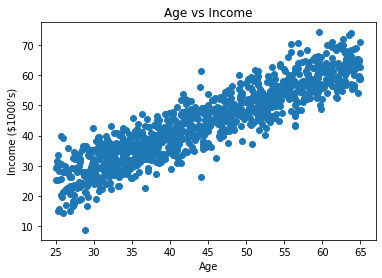

In [5]:
import matplotlib.pyplot as plt
#Let's imagine there is a linear relationship between age and income as demonstrated below:

# income in thousands of dollars

# 1000 samples of people from age 25 to 65
age = np.random.uniform(25, 65, 1000 )

# Income created so it is linearly dependent on age plus normally distributed noise
income = [age + np.random.normal(0, 5, 1000)]

plt.scatter(age, income)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income ($1000\'s)')
plt.show()


In [7]:
# Then convert the target, age, to a binary, above and below the median value:

income_bin = income > np.median(income)
income_bin = income_bin.astype(int)

income_bin = income_bin.reshape(-1,)
age = age.reshape(-1,1)

Text(0, 0.5, 'Income\n (1 when income >= Median )')

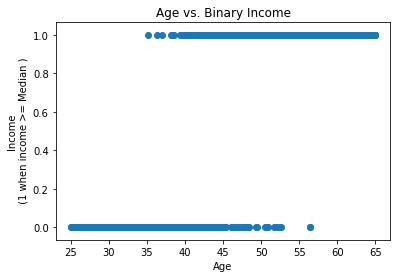

In [8]:
# plot our new data

plt.scatter(age, income_bin)
plt.title('Age vs. Binary Income')
plt.xlabel('Age')
plt.ylabel('Income\n (1 when income >= Median )')

In [9]:
# Logistic regression fits and predicts just like linear regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(age, income_bin)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
print(f'Age coefficient: {lr.coef_[0]}')
print('''The coefficient shows that age is positively correlate with the log odds, 
        and thereby positively correlated with an increase in chance of having 
        an income above the median''')

Age coefficient: [0.37554253]
The coefficient shows that age is positively correlate with the log odds, 
        and thereby positively correlated with an increase in chance of having 
        an income above the median


### Knowledge check: 
Based on your familiarity of linear regression, what other attributes of the lr class would you expect?

In [ ]:
# Your answer here

## Realworld Income Dataset

In [11]:
df = pd.read_csv('salaries_final.csv')
df.head()

,Unnamed: 0,Age,Education,Occupation,Relationship,Race,Sex,Target
0,0,39,Bachelors,Adm-clerical,Not-in-family,White,Male,<=50K
1,1,50,Bachelors,Exec-managerial,Husband,White,Male,<=50K
2,2,38,HS-grad,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,3,53,11th,Handlers-cleaners,Husband,Black,Male,<=50K
4,4,28,Bachelors,Prof-specialty,Wife,Black,Female,<=50K


In [12]:
# drop the Unnamed: 0 column:

df.drop('Unnamed: 0', axis=1, inplace=True)


In [14]:
y = df.Target
X = df[['Age', 'Sex']]
X.head()

,Age,Sex
0,39,Male
1,50,Male
2,38,Male
3,53,Male
4,28,Female


In [15]:
# transform target into a binary, where 1 equals greater than 50k.
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

X['Female'] = ohe.fit_transform(X[['Sex']]).toarray()[:,0]
X.drop('Sex', axis=1, inplace=True)

/Users/johnmaxbarry/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnmaxbarry/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
X.head()

,Age,Female
0,39,0.0
1,50,0.0
2,38,0.0
3,53,0.0
4,28,1.0


In [17]:
# Two important hyperparameters
lr = LogisticRegression(penalty='l2', C=10000)

Like in regression, except now in MLE, the lasso adds a  term to the equation which penalizes models with too many coefficients, and ridge penalizes models with large coefficients. 

The strength of the penalty is the $\lambda$ term

C is the inverse of $\lambda$, so a small C results in a large penalty.


In [18]:
lr = lr.fit(X, y)
y_hat = lr.predict(X)
np.unique(y_hat, return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([31192,  1369]))

# More Metrics to come!

We will have a whole class on metrics, but for now, let's assess our model with accuracy which is the number of correct predictions our model made.


In [19]:
# First metric: Accuracy
from sklearn.metrics import accuracy_score
print(f'Accuracy score: {accuracy_score(y, y_hat)}')

Accuracy score: 0.7419612419765977


In [20]:
for col, coef in zip(list(X.columns), lr.coef_[0]):
    print(col, coef)

Age 0.039029274130854594
Female -1.2484126338519317


In [21]:
# We can also use predict_proba
print('What are these outputs?')
lr.predict_proba(X)

What are these outputs?


array([[0.70773937, 0.29226063],
       [0.611853  , 0.388147  ],
       [0.71574642, 0.28425358],
       ...,
       [0.80079752, 0.19920248],
       [0.82461421, 0.17538579],
       [0.83554703, 0.16445297]])


![final thought](https://media.giphy.com/media/3orieVXTv0XKbstQ2Y/giphy.gif)
    
### A solid understanding of logistic regression will serve you well later in the course, as we will use it to introduce neural networks.